In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import kstest

In [44]:
B_datos = 'C:/Users/juand/OneDrive/Documentos/Codigos/Nueva carpeta/arabica_data_cleaned.csv '
datos = pd.read_csv(B_datos)

In [45]:
datos.head(), datos.info(), datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

(   Unnamed: 0  Species                     Owner Country.of.Origin  \
 0           1  Arabica                 metad plc          Ethiopia   
 1           2  Arabica                 metad plc          Ethiopia   
 2           3  Arabica  grounds for health admin         Guatemala   
 3           4  Arabica       yidnekachew dabessa          Ethiopia   
 4           5  Arabica                 metad plc          Ethiopia   
 
                                   Farm.Name Lot.Number       Mill ICO.Number  \
 0                                 metad plc        NaN  metad plc  2014/2015   
 1                                 metad plc        NaN  metad plc  2014/2015   
 2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
 3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
 4                                 metad plc        NaN  metad plc  2014/2015   
 
                                  Company       Altitude  ...  Color  \
 0      meta

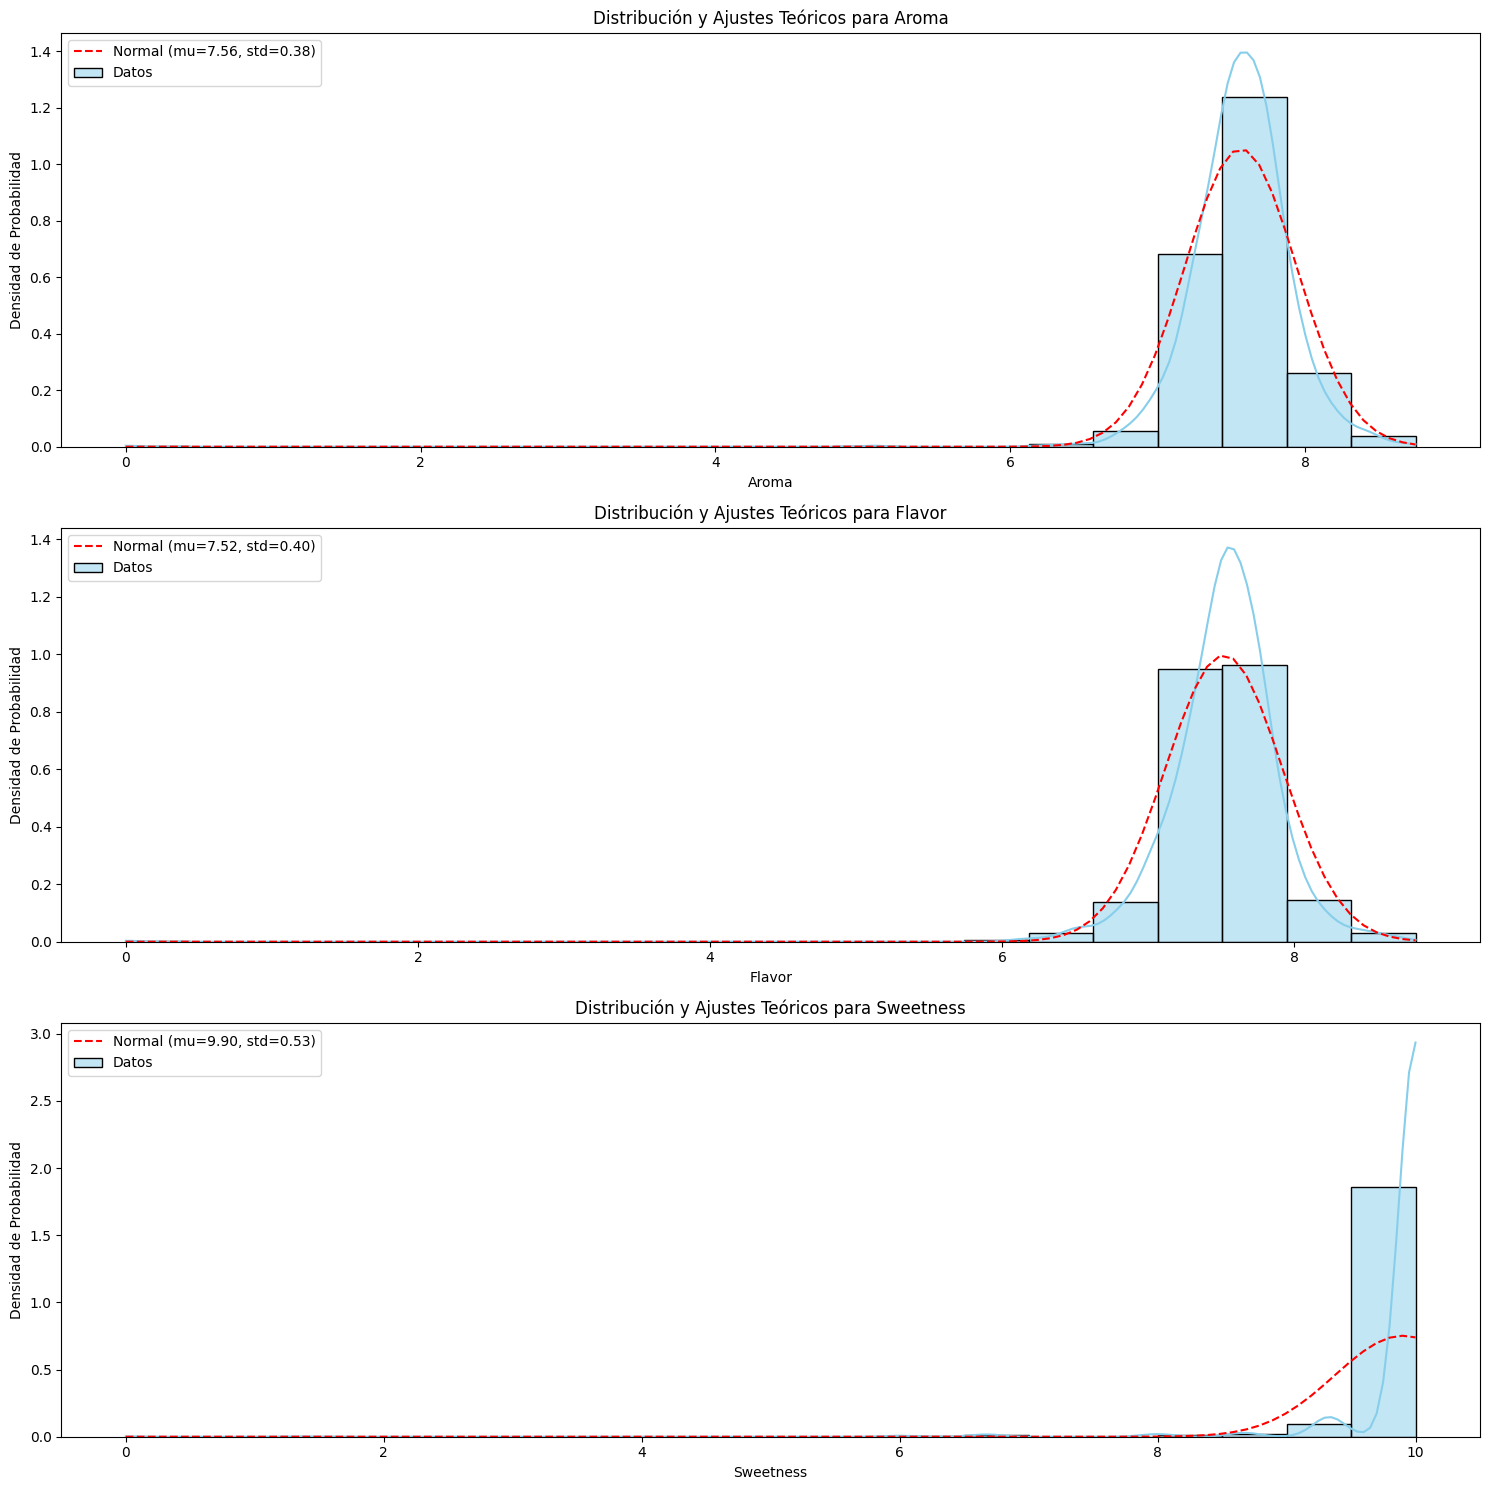


Pruebas de Bondad de Ajuste para la variable Aroma:
  Normal: D=0.9929, p-value=0.0000

Pruebas de Bondad de Ajuste para la variable Flavor:
  Normal: D=0.9906, p-value=0.0000

Pruebas de Bondad de Ajuste para la variable Sweetness:
  Normal: D=0.5014, p-value=0.0000


In [46]:
# Variables a analizar
variables = ['Aroma', 'Flavor', 'Sweetness']

# Definir el tamaño de la figura para que se vean bien las gráficas
plt.figure(figsize=(15, 5 * len(variables)))

# Iterar sobre cada variable
for i, variable in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    
    # Histograma con KDE para visualizar la distribución de los datos
    sns.histplot(datos[variable], kde=True, stat="density", bins=20, label="Datos", color="skyblue")
    
    # Ajustes a distribuciones comunes
    # Normal
    mu, std = norm.fit(datos[variable])
    x = np.linspace(datos[variable].min(), datos[variable].max(), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r--', label=f'Normal (mu={mu:.2f}, std={std:.2f})')
    
    # Log-normal (solo si todos los valores son positivos)
    if (datos[variable] > 0).all():
        shape, loc, scale = stats.lognorm.fit(datos[variable], floc=0)
        plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'g--', label=f'Log-normal (shape={shape:.2f})')
    
    # Gamma (también para valores positivos)
    if (datos[variable] > 0).all():
        alpha, loc, beta_param = stats.gamma.fit(datos[variable], floc=0)
        plt.plot(x, stats.gamma.pdf(x, alpha, loc=loc, scale=beta_param), 'b--', label=f'Gamma (alpha={alpha:.2f})')
    
    # Configuración del gráfico
    plt.title(f'Distribución y Ajustes Teóricos para {variable}')
    plt.xlabel(variable)
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()

plt.tight_layout()
plt.show()

# Prueba de bondad de ajuste Kolmogorov-Smirnov para cada distribución
for variable in variables:
    data = datos[variable].dropna()  # Remover valores nulos para el análisis
    print(f"\nPruebas de Bondad de Ajuste para la variable {variable}:")

    # Normal
    D, p_value = kstest(data, 'norm', args=(mu, std))
    print(f"  Normal: D={D:.4f}, p-value={p_value:.4f}")

    # Log-normal (si todos los valores son positivos)
    if (data > 0).all():
        D, p_value = kstest(data, 'lognorm', args=(shape, loc, scale))
        print(f"  Log-normal: D={D:.4f}, p-value={p_value:.4f}")

    # Gamma (si todos los valores son positivos)
    if (data > 0).all():
        D, p_value = kstest(data, 'gamma', args=(alpha, loc, beta_param))
        print(f"  Gamma: D={D:.4f}, p-value={p_value:.4f}")


In [47]:
# Crear una lista para almacenar las muestras remuestreadas
n_muestras = 1000  # Número de muestras a generar
tamaño_muestra_original = len(datos)  # Tamaño de cada muestra igual al tamaño de la muestra original
muestras_bootstrap = []

# Generar 1000 muestras mediante remuestreo con reemplazo
for _ in range(n_muestras):
    muestra = datos.sample(n=tamaño_muestra_original, replace=True)  # Remuestreo con reemplazo
    muestras_bootstrap.append(muestra)

# Convertir las muestras a un DataFrame con índices de muestra
muestras_bootstrap_df = pd.concat(muestras_bootstrap, keys=range(n_muestras), names=['Muestra', 'Indice']).reset_index(level='Muestra')

# Mostrar las primeras filas de las muestras remuestreadas
print(muestras_bootstrap_df.head())


        Muestra  Unnamed: 0  Species  \
Indice                                 
420           0         421  Arabica   
1054          0        1055  Arabica   
254           0         255  Arabica   
886           0         887  Arabica   
611           0         612  Arabica   

                                           Owner Country.of.Origin  \
Indice                                                               
420                           kawacom uganda ltd            Uganda   
1054    cafe de don balbino s.c. de r.l. de c.v.            Mexico   
254                 doi tung development project          Thailand   
886                     cqi taiwan icp cqi台灣合作夥伴            Taiwan   
611                          josé luis rojas yeo            Mexico   

                                        Farm.Name       Lot.Number  \
Indice                                                               
420         kawacom uganda ltd sipi farmers group  035/170/5061178   
1054    el desmoro

In [49]:
# Diccionarios para almacenar los parámetros de ajuste para cada muestra y cada distribución
parametros_normal = []
parametros_gamma = []

# Iterar sobre cada muestra para calcular los parámetros
for i in range(n_muestras):
    muestra = muestras_bootstrap[i]
    
    # Asegurarse de que la muestra solo contenga valores numéricos y no tenga NaN
    muestra = muestra.select_dtypes(include=[np.number]).dropna()

    # Verificar que la muestra no esté vacía después de eliminar valores no numéricos o NaN
    if muestra.empty:
        parametros_normal.append((None, None))
        parametros_gamma.append((None, None, None))
        continue

    # Ajuste de la distribución normal
    mu, std = norm.fit(muestra)
    parametros_normal.append((mu, std))

    # Ajuste de la distribución gamma (si todos los valores son positivos en la muestra)
    if (muestra > 0).all().all():
        alpha, loc, scale = stats.gamma.fit(muestra, floc=0)
        parametros_gamma.append((alpha, loc, scale))
    else:
        parametros_gamma.append((None, None, None))  # Guardar None si no se puede ajustar

# Convertir los resultados en DataFrames para un análisis más fácil
df_parametros_normal = pd.DataFrame(parametros_normal, columns=['mu', 'std'])
df_parametros_gamma = pd.DataFrame(parametros_gamma, columns=['alpha', 'loc', 'scale'])

# Mostrar los primeros resultados
print("Parámetros de ajuste para la distribución normal (primeras muestras):")
print(df_parametros_normal.head())

print("\nParámetros de ajuste para la distribución gamma (primeras muestras):")
print(df_parametros_gamma.head())


Parámetros de ajuste para la distribución normal (primeras muestras):
           mu          std
0  391.366961  4671.067645
1  287.113376  2614.690048
2  317.406016  3482.461169
3  253.219170   545.613251
4  274.790729  1892.712323

Parámetros de ajuste para la distribución gamma (primeras muestras):
  alpha   loc scale
0  None  None  None
1  None  None  None
2  None  None  None
3  None  None  None
4  None  None  None


Parámetros de la distribución normal:


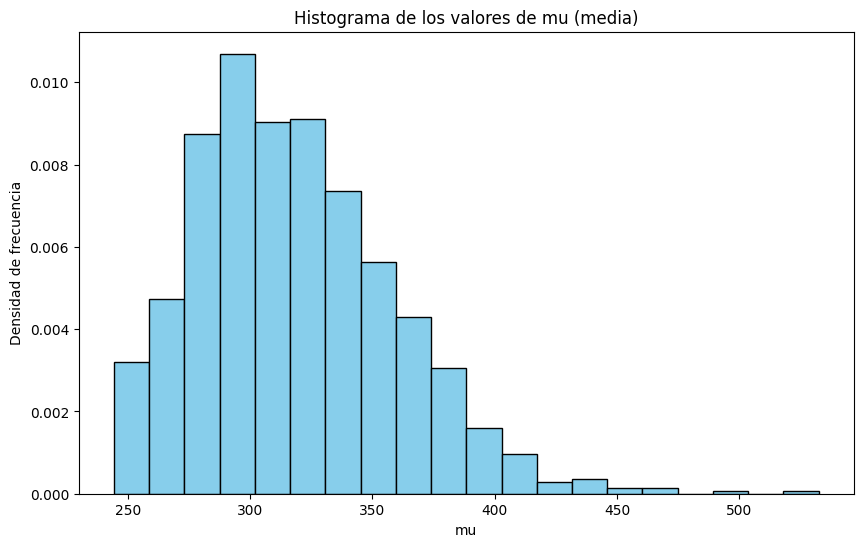

Media de mu: 318.1870737964571
Desviación estándar de mu: 41.087699697676584
Quantiles de mu:
0.25    288.703157
0.50    314.654734
0.75    343.475518
Name: mu, dtype: float64



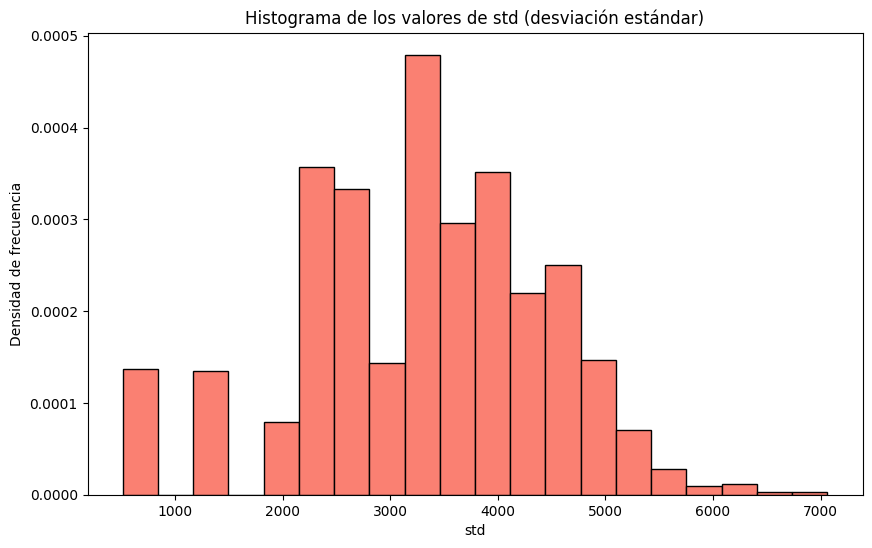

Media de std: 3293.4202983416617
Desviación estándar de std: 1153.0123552895095
Quantiles de std:
0.25    2620.217259
0.50    3416.678759
0.75    4103.696251
Name: std, dtype: float64

Parámetros de la distribución gamma:


c:\Users\juand\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


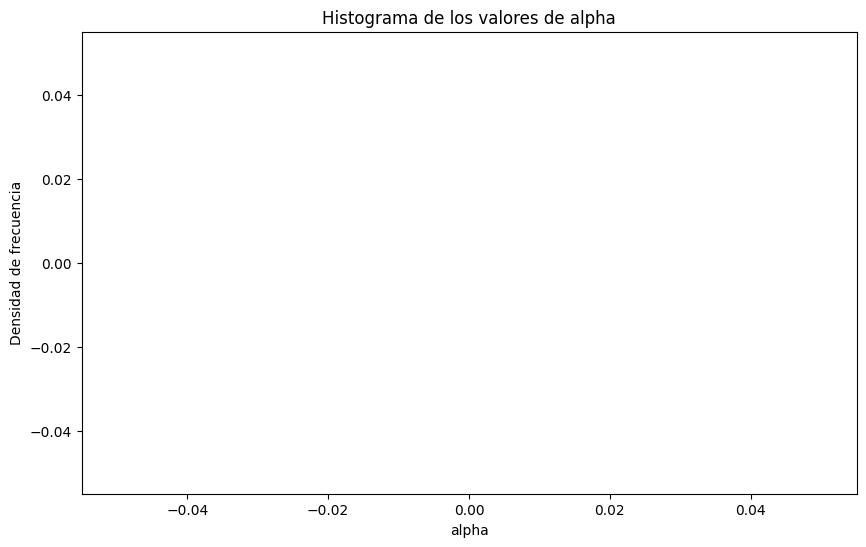

c:\Users\juand\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Media de alpha: nan
Desviación estándar de alpha: nan
Quantiles de alpha:
0.25   NaN
0.50   NaN
0.75   NaN
Name: alpha, dtype: float64



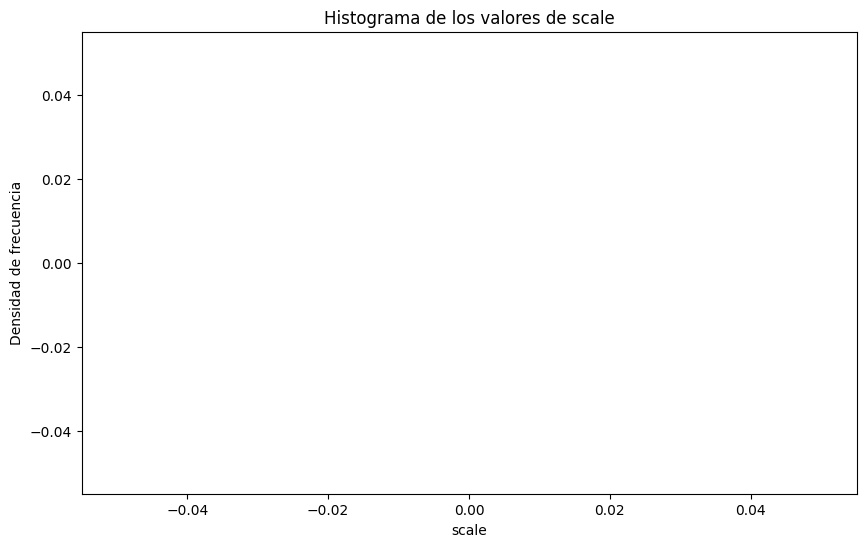

Media de scale: nan
Desviación estándar de scale: nan
Quantiles de scale:
0.25   NaN
0.50   NaN
0.75   NaN
Name: scale, dtype: float64



In [50]:
# Histograma y estadísticas para los parámetros de la distribución normal
print("Parámetros de la distribución normal:")

# Histograma para mu (media de la distribución normal)
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_normal['mu'].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
plt.title("Histograma de los valores de mu (media)")
plt.xlabel("mu")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para mu
media_mu = df_parametros_normal['mu'].mean()
std_mu = df_parametros_normal['mu'].std()
quantiles_mu = df_parametros_normal['mu'].quantile([0.25, 0.5, 0.75])
print(f"Media de mu: {media_mu}")
print(f"Desviación estándar de mu: {std_mu}")
print(f"Quantiles de mu:\n{quantiles_mu}\n")

# Histograma para std (desviación estándar de la distribución normal)
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_normal['std'].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
plt.title("Histograma de los valores de std (desviación estándar)")
plt.xlabel("std")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para std
media_std = df_parametros_normal['std'].mean()
std_std = df_parametros_normal['std'].std()
quantiles_std = df_parametros_normal['std'].quantile([0.25, 0.5, 0.75])
print(f"Media de std: {media_std}")
print(f"Desviación estándar de std: {std_std}")
print(f"Quantiles de std:\n{quantiles_std}\n")

# Histograma y estadísticas para los parámetros de la distribución gamma, si se utilizaron en el análisis
print("Parámetros de la distribución gamma:")

# Histograma para alpha
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_gamma['alpha'].dropna(), bins=20, color='lightgreen', edgecolor='black', density=True)
plt.title("Histograma de los valores de alpha")
plt.xlabel("alpha")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para alpha
media_alpha = df_parametros_gamma['alpha'].mean()
std_alpha = df_parametros_gamma['alpha'].std()
quantiles_alpha = df_parametros_gamma['alpha'].quantile([0.25, 0.5, 0.75])
print(f"Media de alpha: {media_alpha}")
print(f"Desviación estándar de alpha: {std_alpha}")
print(f"Quantiles de alpha:\n{quantiles_alpha}\n")

# Histograma para scale
plt.figure(figsize=(10, 6))
plt.hist(df_parametros_gamma['scale'].dropna(), bins=20, color='gold', edgecolor='black', density=True)
plt.title("Histograma de los valores de scale")
plt.xlabel("scale")
plt.ylabel("Densidad de frecuencia")
plt.show()

# Estadísticas para scale
media_scale = df_parametros_gamma['scale'].mean()
std_scale = df_parametros_gamma['scale'].std()
quantiles_scale = df_parametros_gamma['scale'].quantile([0.25, 0.5, 0.75])
print(f"Media de scale: {media_scale}")
print(f"Desviación estándar de scale: {std_scale}")
print(f"Quantiles de scale:\n{quantiles_scale}\n")

In [51]:
# Calcula el valor medio y el error estándar para cada parámetro de la distribución normal
media_mu = df_parametros_normal['mu'].mean()
error_std_mu = df_parametros_normal['mu'].std() / np.sqrt(len(df_parametros_normal['mu'].dropna()))

media_std = df_parametros_normal['std'].mean()
error_std_std = df_parametros_normal['std'].std() / np.sqrt(len(df_parametros_normal['std'].dropna()))

# Muestra los resultados para los parámetros de la distribución normal
print("Resultados para los parámetros de la distribución normal ajustados a una Gaussiana:")
print(f"mu: Valor medio = {media_mu:.4f}, Error estándar = {error_std_mu:.4f}")
print(f"std: Valor medio = {media_std:.4f}, Error estándar = {error_std_std:.4f}\n")

# Calcula el valor medio y el error estándar para cada parámetro de la distribución gamma (si se usa)
media_alpha = df_parametros_gamma['alpha'].mean()
error_std_alpha = df_parametros_gamma['alpha'].std() / np.sqrt(len(df_parametros_gamma['alpha'].dropna()))

media_scale = df_parametros_gamma['scale'].mean()
error_std_scale = df_parametros_gamma['scale'].std() / np.sqrt(len(df_parametros_gamma['scale'].dropna()))

# Muestra los resultados para los parámetros de la distribución gamma
print("Resultados para los parámetros de la distribución gamma ajustados a una Gaussiana:")
print(f"alpha: Valor medio = {media_alpha:.4f}, Error estándar = {error_std_alpha:.4f}")
print(f"scale: Valor medio = {media_scale:.4f}, Error estándar = {error_std_scale:.4f}")


Resultados para los parámetros de la distribución normal ajustados a una Gaussiana:
mu: Valor medio = 318.1871, Error estándar = 1.2993
std: Valor medio = 3293.4203, Error estándar = 36.4615

Resultados para los parámetros de la distribución gamma ajustados a una Gaussiana:
alpha: Valor medio = nan, Error estándar = nan
scale: Valor medio = nan, Error estándar = nan


In [52]:
# Definir los parámetros ajustados a la distribución teórica para el bootstrap paramétrico
# (mu y std en el caso de una distribución normal)
mu_ajustado, std_ajustado = norm.fit(datos['Aroma'])  # Cambia 'Aroma' por la variable correspondiente

# Crear una lista para almacenar las muestras de bootstrap
muestras_bootstrap_param = []

# Realizar el bootstrap paramétrico generando muestras de una distribución normal con los parámetros ajustados
for _ in range(1000):
    muestra_param = np.random.normal(loc=mu_ajustado, scale=std_ajustado, size=len(datos))
    muestras_bootstrap_param.append(muestra_param)

# Convertir las muestras a un DataFrame para facilitar el análisis
df_bootstrap_param = pd.DataFrame(muestras_bootstrap_param).T

# Mostrar las primeras filas del DataFrame de bootstrap
print("Ejemplo de las primeras muestras bootstrap paramétricas:")
print(df_bootstrap_param.head())


Ejemplo de las primeras muestras bootstrap paramétricas:
        0         1         2         3         4         5         6    \
0  8.359473  7.494071  7.843237  8.124703  7.743735  7.288500  7.953177   
1  7.805397  7.973164  7.629794  7.773274  7.898010  7.462076  7.172686   
2  8.492361  6.898551  7.429092  7.390509  7.348238  8.314793  7.121029   
3  7.381783  7.576880  6.688574  7.292195  7.327372  7.403096  7.714073   
4  7.049923  7.283701  8.264797  7.716166  6.559994  7.895062  7.109648   

        7         8         9    ...       990       991       992       993  \
0  7.807978  7.356732  7.719468  ...  7.578550  7.960100  7.816201  7.501011   
1  7.363616  6.767686  8.006241  ...  7.622014  7.552552  7.325470  7.419477   
2  7.727478  6.977966  7.594457  ...  7.695132  8.209437  7.852273  6.913513   
3  7.755216  7.521253  8.182242  ...  7.253869  7.214012  7.646857  6.845088   
4  7.707516  7.465574  8.275286  ...  7.354831  7.396037  7.762757  7.169522   

        994